In [1]:
import datetime, time
import simpy

import shapely.geometry

import pandas as pd
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

# setup environment
simulation_start = 0
my_env = simpy.Environment(initial_time=simulation_start)
registry = {}
keep_resources = {}

In [2]:
Site = type(
    "Site",
    (
        core.Identifiable,
        core.Log,
        core.Locatable,
        core.HasContainer,
        core.HasResource,
    ),
    {},
)

TransportProcessingResource = type(
    "TransportProcessingResource",
    (
        core.Identifiable,
        core.Log,
        core.ContainerDependentMovable,
        core.Processor,
        core.LoadingFunction,
        core.UnloadingFunction,
        core.HasResource,
    ),
    {},
)

In [3]:
location_from_site = shapely.geometry.Point(4.18055556, 52.18664444)  # lon, lat
location_to_site = shapely.geometry.Point(4.25222222, 52.11428333)  # lon, lat

data_from_site = {
    "env": my_env,
    "name": "Winlocatie",
    "geometry": location_from_site,
    "capacity": 10_000,
    "level": 10_000,
}


data_to_site = {
    "env": my_env,
    "name": "Dumplocatie",
    "geometry": location_to_site,
    "capacity": 10_000,
    "level": 0,
}

from_site = Site(**data_from_site)
to_site = Site(**data_to_site)

In [4]:
data_hopper = {
    "env": my_env,
    "name": "Hopper 01",
    "geometry": location_from_site,
    "capacity":1000,
    "compute_v":lambda x: 10 + 2 * x,
    "loading_rate":1,
    "unloading_rate":5,
}

hopper = TransportProcessingResource(**data_hopper)

In [5]:
single_run, activity, while_activity  = model.single_run_process(
    name="single_run",
    registry={},
    env=my_env,
    origin=from_site,
    destination=to_site,
    mover=hopper,
    loader=hopper,
    unloader=hopper
)

In [6]:
my_env.run()

In [7]:
display(plot.get_log_dataframe(hopper, [*single_run, activity, while_activity]))

,Timestamp,Activity,ActivityState,geometry,container level
0,1970-01-01 00:00:00.000000,single_run sailing empty,START,POINT (4.18055556 52.18664444),0.0
1,1970-01-01 00:00:00.000000,single_run sailing empty,STOP,POINT (4.18055556 52.18664444),0.0
2,1970-01-01 00:00:00.000000,single_run loading,START,POINT (4.18055556 52.18664444),0.0
3,1970-01-01 00:00:00.000000,single_run loading,START,POINT (4.18055556 52.18664444),0.0
4,1970-01-01 00:16:40.000000,single_run loading,STOP,POINT (4.18055556 52.18664444),1000.0
...,...,...,...,...,...
115,1970-01-01 07:49:02.292915,single_run sailing filled,STOP,POINT (4.25222222 52.11428333),1000.0
116,1970-01-01 07:49:02.292915,single_run unloading,START,POINT (4.25222222 52.11428333),1000.0
117,1970-01-01 07:49:02.292915,single_run unloading,START,POINT (4.25222222 52.11428333),0.0
118,1970-01-01 07:52:22.292915,single_run unloading,STOP,POINT (4.25222222 52.11428333),0.0


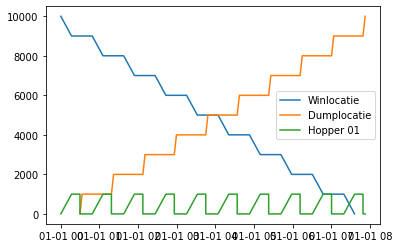

In [9]:
fig = plot.get_step_chart([from_site, to_site, hopper])